# Introduction à l'apprentissage automatique - TP3 exercice 1

### Classification supervisée sur données synthétiques

<br>

Le code des deux cellules suivantes permet d'afficher une classification au plus proche voisin d'un jeu de données synthétiques. Dans le cas où le paramètre `std` de la fonction `make_blobs` est fixé à 1.0, les données sont linéairement séparables.

<br>

In [1]:
from sklearn import datasets, neighbors, linear_model, naive_bayes
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def plot_classif_result(X,y,clf,title):
    # cf: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    # color maps:
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    
    
    h=0.1 # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title);

score 1-NN 1.00


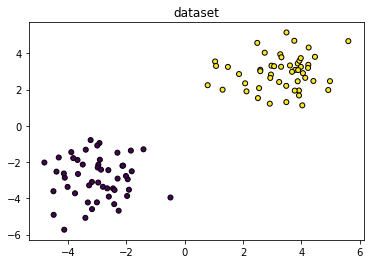

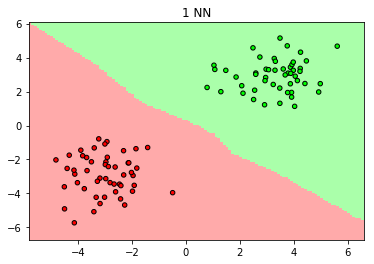

In [7]:
X_train, Y_train = datasets.make_blobs(n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=1.0)  # c'est ici qu'il faudra faire varier std à la fin de l'exercice

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.title('dataset');

NN = neighbors.KNeighborsClassifier(n_neighbors=1)    
NN.fit(X_train, Y_train)
plot_classif_result(X_train,Y_train,NN,"1 NN")
print("score 1-NN %.2f" % NN.score(X_train, Y_train) )

Quelle interprétation donnez-vous au graphique affiché par la fonction `plot_classif_result` ? 

Que dire du score calculé ?

Constatez qu'à chaque exécution, le jeu de données change (et parfois, il n'est pas linéairement séparable...). Dans les questions suivantes, il pourra utile de relancer plusieurs fois votre programme pour observer les résultats sur différentes données.


In [4]:
# Le graphique représente les zonnes attribuées à chaque classe.
# Le score indique la proportion de points attrivués à la bonne zone après l'apprentissage.

Complétez le script pour afficher également le résultat de la classification aux 5, 10, 20 (par exemple) plus proches voisins, de la classification bayésienne naïve gaussienne, de la régression logistique, puis de la classification par l'algorithme du perceptron. Vous afficherez également dans tous les cas les temps de calcul pour `plot_classif_result`, ainsi que les paramètres estimés dans les deux derniers modèles.

__Indications__:

Documentation sur la [régression logistique](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Documentation sur le [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)


score 1-NN 0.99


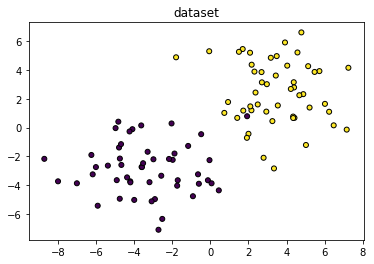

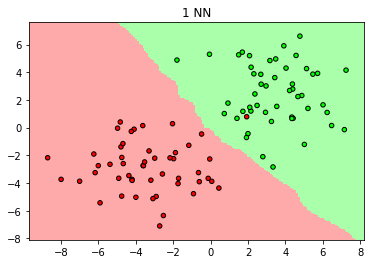

In [13]:
# 10 plus proches voisins.

X_train, Y_train = datasets.make_blobs(n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=2)  # c'est ici qu'il faudra faire varier std à la fin de l'exercice

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.title('dataset');

NN = neighbors.KNeighborsClassifier(n_neighbors=10)    
NN.fit(X_train, Y_train)
plot_classif_result(X_train,Y_train,NN,"1 NN")
print("score 1-NN %.2f" % NN.score(X_train, Y_train) )


score clf 0.99


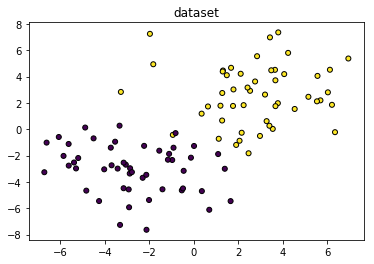

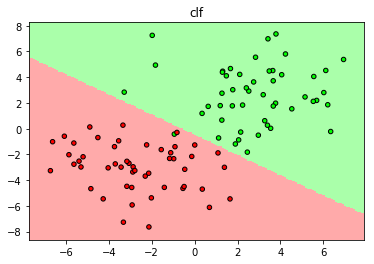

In [19]:
# classification bayésienne naïve gaussienne.

X_train, Y_train = datasets.make_blobs(n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=2)  # c'est ici qu'il faudra faire varier std à la fin de l'exercice

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.title('dataset');

clf = linear_model.LogisticRegression(solver='liblinear')   
clf.fit(X_train, Y_train)
plot_classif_result(X_train,Y_train,clf,"clf")
print("score clf %.2f" % clf.score(X_train, Y_train) )

C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


score clf 0.94


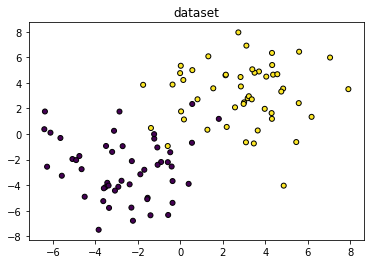

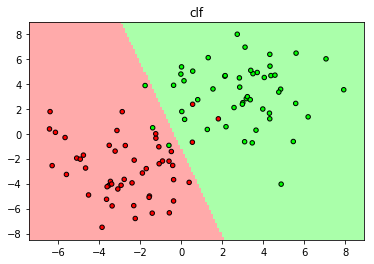

In [22]:
# classification par perceptron.

X_train, Y_train = datasets.make_blobs(n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=2)  # c'est ici qu'il faudra faire varier std à la fin de l'exercice

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.title('dataset');

clf = linear_model.Perceptron(max_iter=200)   
clf.fit(X_train, Y_train)
plot_classif_result(X_train,Y_train,clf,"clf")
print("score clf %.2f" % clf.score(X_train, Y_train) )

Exécutez plusieurs fois l'estimation des modèles de la régression logistique et du perceptron en réordonnant au hasard le jeu de données à chaque exécution. Constatez la variabilité de la séparation entre les deux classes trouvée par le perceptron.

_Indication_: le code suivant réordonne un `array` Numpy `X` en permutant aléatoirement ses lignes:

```python
permut=np.random.permutation(len(X))
Xpermut=X[permut,:]
```

score 1-NN 1.00
score clf 0.79
score perc 0.52


C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


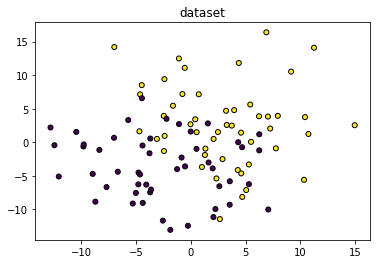

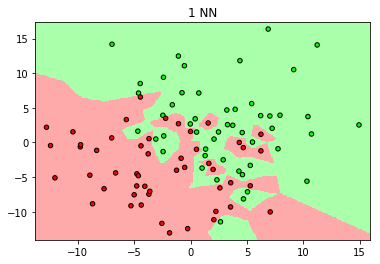

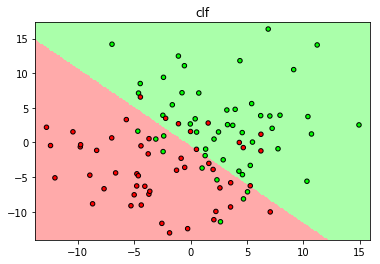

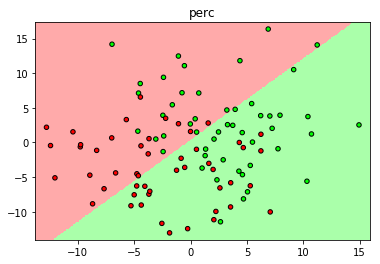

In [25]:
# Comparaison perceptron/Reglog

X_train, Y_train = datasets.make_blobs(n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=5)  # c'est ici qu'il faudra faire varier std à la fin de l'exercice

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.title('dataset');

NN = neighbors.KNeighborsClassifier(n_neighbors=1)    
scores = cross_val_score(clf, digits.data, digits.target, cv=5)
plot_classif_result(X_train,Y_train,NN,"1 NN")
print("score 1-NN %.2f" % NN.score(X_train, Y_train) )

clf = linear_model.LogisticRegression(solver='liblinear')   
clf.fit(X_train, Y_train)
plot_classif_result(X_train,Y_train,clf,"clf")
print("score clf %.2f" % clf.score(X_train, Y_train) )

perc = linear_model.Perceptron(max_iter=200)   
perc.fit(X_train, Y_train)
plot_classif_result(X_train,Y_train,perc,"perc")
print("score perc %.2f" % perc.score(X_train, Y_train) )

<br>

Augmentez la valeur du paramètre `std` lors de la génération des données: par exemple pour `std=5.0`, les données ne sont plus linéairement séparables. Pour chacune des méthodes précédentes, calculez le score de classification sur la base d'entraînement. Observez là aussi la variabilité des résultats du perceptron.
  